# Final Project Submission


Student Name: Asad Rahman

Student Pace: Full Time

Scheduled project review date/time: Mon Apr 8,2019 . 10am

Instructor Name: Eli Thomas , Victor Geislinger

Blog Post URL: https://asadrahman0094.github.io/

In [1]:
#import libraries
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as ols
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

## Obtain

This step involves understanding requirements gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem. 

In [2]:
#preview the data
data = pd.read_csv("kc_house_data.csv")
display(data.head())
display(data.columns)
display(data.info())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

The data shows 21597 entries with 21 columns. Some datapoints seem to be represented by incorrect data types for their column description. Some also seem to contain missing/null values.

## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Scrubbing our Data

We'll glance at each category and make sure its representing the right data and also check if each column has useful information, as well as clean up any null values. Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage. The line with this stage really blurs with the Explore stage

### ID

In [3]:
print("{} null values".format(data.id.isna().sum()))
display(data.id.dtype)
data.id.value_counts()

0 null values


dtype('int64')

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
5282200015    2
2787460720    2
5536100020    2
2568300045    2
8648900110    2
8910500150    2
2044500213    2
4222310010    2
8651402750    2
8820903380    2
4345000510    2
641900050     2
1823049202    2
8121100395    2
6308000010    2
1139600270    2
937000330     2
3293700496    2
4435000705    2
5430300171    2
             ..
9454200030    1
8857640710    1
7519001825    1
3992700130    1
7515000035    1
5608010980    1
475000510     1
4038300010    1
2770603522    1
2738640470    1
9238480020    1
9492500170    1
2607740100    1
880000189     1
7974200510    1
6815100095    1
2617300160    1
2768100545    1
3324069058    1
1931300035    1
1922000070    1
8165500110    1
7893808220    1
3333002440    1
3420069065    1
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420,

The ID should be represented as a string because it represents categorical data

In [4]:
data.id = data.id.astype("str")

I noticed that Id's represented multiple entries, so I evaluated one to see if the data could be merged

In [5]:
data[data["id"]== "795000620"]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


The different entries of repeat id's were instances of the house being resold on different dates. Although that data is helpful, specific house id's are not for this analysis so it can be dropped.

In [6]:
data = data.drop("id",axis=1)

### Date

In [7]:
print("{} null values".format(data.date.isna().sum()))
display(data.date.dtype)
data.date.value_counts()

0 null values


dtype('O')

6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
3/25/2015     123
4/28/2015     121
7/9/2014      121
4/22/2015     121
4/14/2015     121
4/21/2015     119
6/24/2014     119
8/26/2014     117
10/28/2014    117
5/20/2014     116
7/14/2014     116
7/1/2014      115
8/20/2014     114
6/17/2014     113
4/29/2015     113
7/29/2014     112
4/8/2015      112
7/16/2014     111
5/28/2014     111
4/23/2015     110
8/5/2014      109
3/27/2015     109
8/25/2014     109
8/11/2014     107
7/23/2014     107
             ... 
10/12/2014      3
7/6/2014        3
8/10/2014       3
5/10/2015       2
7/4/2014        2
12/27/2014      2
9/7/2014        2
8/9/2014        2
11/28/2014      2
5/11/2014       2
11/15/2014      2
2/1/2015        2
10/11/2014      2
8/24/2014       2
12/7/2014       2
12/21/2014      2
7/27/2014       1
5/15/2015       1
8/3/2014        1
8/30/2014       1
11/2/2014       1
11/30/2014      1
5/27/2015       1
1/31/2015       1
5/24/2015 

In [8]:
data.date = pd.to_datetime(data.date)

For future manipulation, we set the date category to datetime

### Price

In [9]:
print("{} null values".format(data.price.isna().sum()))
display(data.price.dtype)
data.price.value_counts()

0 null values


dtype('float64')

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    133
525000.0    131
250000.0    130
475000.0    120
330000.0    119
650000.0    117
275000.0    113
415000.0    111
315000.0    111
390000.0    110
600000.0    110
440000.0    109
280000.0    109
320000.0    107
435000.0    105
340000.0    103
310000.0    101
335000.0     98
420000.0     97
360000.0     96
260000.0     95
265000.0     94
           ... 
402395.0      1
575550.0      1
271310.0      1
242150.0      1
837500.0      1
608095.0      1
287653.0      1
484259.0      1
336800.0      1
873000.0      1
837700.0      1
118000.0      1
641200.0      1
969000.0      1
386180.0      1
608500.0      1
542950.0      1
968933.0      1
641250.0      1
575700.0      1
739500.0      1
575575.0      1
418900.0      1
234975.0      1
804995.0      1
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 362

### Bedrooms

In [10]:
print("{} null values".format(data.bedrooms.isna().sum()))
display(data.bedrooms.dtype)
data.bedrooms.value_counts()

0 null values


dtype('int64')

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
data.bedrooms = data.bedrooms.astype("float")

While scrubbing the data, bedrooms is acceptable. But for future reference there seems to be some outliers

### Bathrooms

In [12]:
print("{} null values".format(data.bathrooms.isna().sum()))
display(data.bathrooms.dtype)
data.bathrooms.value_counts()

0 null values


dtype('float64')

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Floats are an appropriate measurement for number of bathrooms due to certain bathrooms being categorized by their accomedations/lack-of. (Having a toilet, shower, etc)

### Square foot living

In [13]:
print("{} null values".format(data.sqft_living.isna().sum()))
display(data.sqft_living.dtype)
data.sqft_living.value_counts()

0 null values


dtype('int64')

1300     138
1400     135
1440     133
1660     129
1010     129
1800     129
1820     128
1480     125
1720     125
1540     124
1560     124
1320     122
1250     120
1580     119
1200     118
1370     118
1650     117
1900     117
1780     117
1680     116
2100     116
1460     116
1430     115
1740     115
1830     114
1510     114
1340     113
1260     113
1500     112
1240     112
        ... 
2153       1
2105       1
2007       1
6085       1
2015       1
8020       1
12050      1
1767       1
1639       1
2473       1
440        1
2601       1
5210       1
3545       1
1496       1
5530       1
1352       1
3305       1
1256       1
3273       1
1048       1
2665       1
5130       1
3065       1
3001       1
4970       1
2905       1
2793       1
4810       1
1975       1
Name: sqft_living, Length: 1034, dtype: int64

In [14]:
data.sqft_living = data.sqft_living.astype("float")

### Square foot lot

In [15]:
print("{} null values".format(data.sqft_lot.isna().sum()))
display(data.sqft_lot.dtype)
data.sqft_lot.value_counts()

0 null values


dtype('int64')

5000      358
6000      290
4000      251
7200      220
7500      119
4800      119
4500      114
8400      111
9600      109
3600      103
9000       93
3000       84
5100       78
7000       76
8000       76
5500       73
8100       72
7800       69
4080       67
7700       66
5200       64
7350       64
5750       61
4400       56
5400       54
6600       52
6250       50
4200       49
7560       48
10000      46
         ... 
953         1
64438       1
9133        1
937         1
13071       1
31510       1
6938        1
11036       1
8989        1
15134       1
13087       1
809         1
4907        1
9005        1
35640       1
9021        1
6986        1
11084       1
11315       1
857         1
4987        1
11132       1
11148       1
27540       1
35736       1
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

In [16]:
data.sqft_lot = data.sqft_lot.astype("float")

### Floors

In [17]:
print("{} null values".format(data.floors.isna().sum()))
display(data.floors.dtype)
data.floors.value_counts()

0 null values


dtype('float64')

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

Although #.5 floors is not a common numbering scheme, there seems to be consistency in the data.

### Waterfront

In [18]:
print("{} null values".format(data.waterfront.isna().sum()))
display(data.waterfront.dtype)
data.waterfront.value_counts()

2376 null values


dtype('float64')

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [19]:
null_waterfront = data.waterfront.isna().sum()/(data.waterfront.isna().sum() + data.waterfront.count())
print("{}% of the data is NaN values".format(null_waterfront))

0.11001527989998611% of the data is NaN values


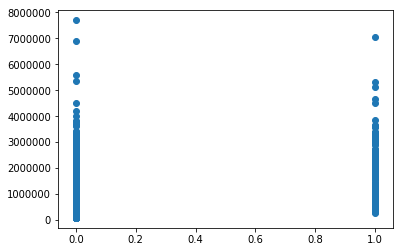

In [20]:
#Does any one variable result in a significant change of price?
plt.scatter(data.waterfront,data.price)

In [21]:
data = data.drop("waterfront",axis=1)

At first it's evident the waterfront category represents a boolean, as well as contains null values making up 11% of the data. It's also evident that a majority of the properties are not located near the waterfront. A quick plot shows that regardless of which bool is tested, both are present in a broad spectrum of resulting housing prices. For this reason I have opted to drop this category.

### View

In [22]:
print("{} null values".format(data.view.isna().sum()))
display(data.view.dtype)
data.view.value_counts()

63 null values


dtype('float64')

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

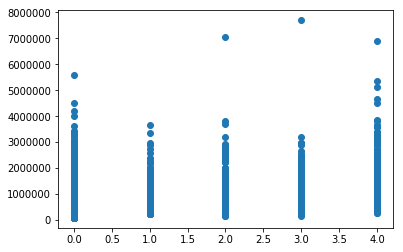

In [23]:
plt.scatter(data.view,data.price)

In [24]:
data = data.drop("view",axis=1)

Although it is unclear exactly what view represents, the description "Has been viewed" implies how many times the property had been viewed. An overwhelming amount of properties were not viewed, but like the waterfront category before the pricing is well represented by all possible categorical options. For this reason, I have chosen to drop this column.

### Conditions

In [25]:
print("{} null values".format(data.condition.isna().sum()))
display(data.condition.dtype)
data.condition.value_counts()

0 null values


dtype('int64')

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [26]:
data.condition = data.condition.astype("float")

### Grade

In [27]:
print("{} null values".format(data.grade.isna().sum()))
display(data.grade.dtype)
data.grade.value_counts()

0 null values


dtype('int64')

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [28]:
data.grade = data.grade.astype("float")

### Square Foot Above

In [29]:
print("{} null values".format(data.sqft_above.isna().sum()))
display(data.sqft_above.dtype)
data.sqft_above.value_counts()

0 null values


dtype('int64')

1300    212
1010    210
1200    206
1220    192
1140    184
1400    180
1060    178
1180    177
1340    176
1250    174
1320    172
1100    164
1080    161
1040    160
1240    160
1150    159
1330    158
1260    155
1440    155
1120    154
1370    153
1270    153
1280    151
1090    148
1390    147
1210    147
1290    146
1540    145
960     144
1160    143
       ... 
2153      1
2105      1
2007      1
2015      1
2313      1
8020      1
1767      1
1479      1
3526      1
1463      1
1239      1
4330      1
2393      1
1256      1
2793      1
1144      1
5130      1
3065      1
3001      1
2905      1
4890      1
4810      1
2425      1
8860      1
2665      1
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

In [30]:
data.sqft_above = data.sqft_above.astype("float")

### Square Foot Basement

In [31]:
print("{} null values".format(data.sqft_basement.isna().sum()))
display(data.sqft_basement.dtype)
data.sqft_basement.value_counts()

0 null values


dtype('O')

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
266.0         1
1960.0        1
276.0         1
1248.0        1
2240.0        1
2130.0        1
602.0         1
2720.0        1
1284.0        1
768.0         1
415.0         1
1525.0        1
875.0         1
2810.0        1
2600.0        1
1880.0        1
295.0         1
2500.0        1
3000.0        1
516.0         1
2490.0        1
1816.0        1
207.0         1
861.0         1
1135.0        1
792.0         1
374.0         1
65.0          1
1281.0        1
3500.0        1
Name: sqft_basement, Len

In [32]:
data.sqft_basement = data.sqft_basement.replace("?","0") #replace the improper variable with a 0
data.sqft_basement = data.sqft_basement.astype("float").astype("int64") #parse string to float, then int due to 0.0 parse error

In [33]:
data.sqft_basement.describe() #is the data distrubted in any way we can bin it?

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [34]:
#create a new bool category where each property "has_basement" is true or false
data.loc[data["sqft_basement"] == 0, "has_basement"] = "0"
data.loc[data["sqft_basement"] != 0, "has_basement"] = "1"

In [35]:
data = data.drop("sqft_basement",axis=1)

In [36]:
display(data.has_basement.dtype)
data.has_basement.value_counts()

dtype('O')

0    13280
1     8317
Name: has_basement, dtype: int64

Although no null values were found, a clear error was seen as a variable "?" was included in an otherwise all numerical dataset. These variables were replaced to represent the mode ("0") and then all variables were converted from type object to type integer.

### Year Built

In [37]:
print("{} null values".format(data.yr_built.isna().sum()))
display(data.yr_built.dtype)
data.yr_built.value_counts()

0 null values


dtype('int64')

2014    559
2006    453
2005    450
2004    433
2003    420
2007    417
1977    417
1978    387
1968    381
2008    367
1967    350
1979    343
1959    334
1990    317
1962    312
2001    305
1954    305
1987    294
1989    290
1969    280
1955    271
1988    270
1947    263
1999    263
1963    255
1976    253
1966    249
1994    249
1950    249
1960    248
       ... 
1909     94
1906     92
1930     90
1919     88
1900     87
1908     86
1923     84
1912     79
1916     79
1921     76
1905     74
1911     73
1937     68
1907     65
1915     64
1931     61
1913     58
1917     56
1914     54
1938     52
1903     46
1904     45
1936     40
1932     38
2015     38
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [38]:
data.yr_built = data.yr_built.astype("float")

### Year Renovated

In [39]:
print("{} null values".format(data.yr_renovated.isna().sum()))
none_renovated = data.yr_renovated.isna().sum()/(data.yr_renovated.isna().sum() + data.yr_renovated.count())
print("{}% of the data is NaN values".format(none_renovated))
display(data.yr_renovated.dtype)
data.yr_renovated.value_counts()

3842 null values
0.17789507802009538% of the data is NaN values


dtype('float64')

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [40]:
#Most of the houses have never been renovated so we'll represent the NaN values as a part of that data
data.yr_renovated.fillna(0,inplace=True)

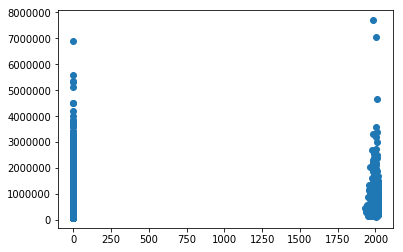

In [41]:
plt.scatter(data.yr_renovated,data.price)

In [42]:
#The amount of houses that have never been renovated is still overwhelming compared to those that have been
#Here we edit the columns, categorizing "renovated" against "nonrenovated" houses.
data.loc[data["yr_renovated"]==0, "is_renovated"]= "0"
data.loc[data["yr_renovated"]!=0, "is_renovated"]= "1"

In [43]:
data.drop("yr_renovated",axis=1,inplace=True)

In [44]:
display(data.is_renovated.dtype)
data.is_renovated.value_counts()

dtype('O')

0    20853
1      744
Name: is_renovated, dtype: int64

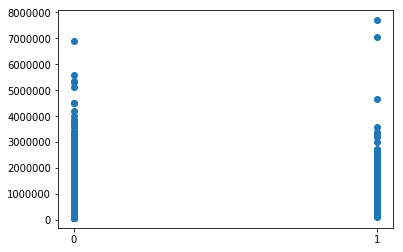

In [45]:
plt.scatter(data.is_renovated,data.price)

In [46]:
data = data.drop("is_renovated",axis=1)

Even after tweaking the data to represent all recorded renovated houses as "is renovated" against unrecorded/recorded false responses, the resulting price regardless of renovations is variant enough where I feel comfortable dropping this category.

### Zipcode

In [47]:
print("{} null values".format(data.zipcode.isna().sum()))
display(data.zipcode.dtype)
data.zipcode.value_counts()

0 null values


dtype('int64')

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [48]:
data.zipcode = data.zipcode.astype("str") #convert categorical data to string

### Longitude & Latitude

In [49]:
data = data.drop("long",axis=1)
data = data.drop("lat",axis = 1)

I preemptively removed both longitude and latitude from my dataset. Although they both are important sets of information when used in conjunction, a linear regression will have a hard time modeling them via the techniques I have learned thus far.

### Square foot living, nearest 15 neighbors

In [50]:
print("{} null values".format(data.sqft_living15.isna().sum()))
display(data.sqft_living15.dtype)
data.sqft_living15.value_counts()

0 null values


dtype('int64')

1540    197
1440    195
1560    192
1500    180
1460    169
1580    167
1610    166
1800    166
1720    166
1620    164
1510    164
1760    163
1480    160
1410    159
1550    158
1820    157
1680    157
1670    157
1520    155
1660    155
1300    154
1780    154
1570    154
1470    153
1640    152
1600    149
1320    148
1530    148
1420    148
1690    148
       ... 
2091      1
2155      1
2363      1
1448      1
1352      1
1336      1
2297      1
1303      1
1399      1
1415      1
3494      1
1463      1
1495      1
1815      1
1943      1
4250      1
4330      1
4362      1
1304      1
2409      1
2425      1
4490      1
4570      1
2697      1
2793      1
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

In [51]:
data.sqft_living15 = data.sqft_living15.astype("float")

### Square foot lot, nearest 15 neighbors

In [52]:
print("{} null values".format(data.sqft_lot15.isna().sum()))
display(data.sqft_lot15.dtype)
data.sqft_lot15.value_counts()

0 null values


dtype('int64')

5000      427
4000      356
6000      288
7200      210
4800      145
7500      142
8400      116
4500      111
3600      111
5100      109
4080      106
8000      105
9600       98
8100       93
9000       92
7800       86
7700       85
5500       81
5400       71
6600       68
7350       67
5200       66
5750       64
4400       63
4200       61
10000      58
7560       57
5250       52
3000       52
9750       49
         ... 
953         1
5051        1
11196       1
13247       1
11068       1
11052       1
35496       1
4907        1
11816       1
6842        1
4795        1
10940       1
4811        1
8909        1
23250       1
6874        1
15070       1
6890        1
35576       1
9594        1
11004       1
17153       1
11020       1
6938        1
4891        1
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

In [53]:
data.sqft_lot15 = data.sqft_lot15.astype("float")

###### Final Variable Info

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null float64
sqft_lot         21597 non-null float64
floors           21597 non-null float64
condition        21597 non-null float64
grade            21597 non-null float64
sqft_above       21597 non-null float64
yr_built         21597 non-null float64
zipcode          21597 non-null object
sqft_living15    21597 non-null float64
sqft_lot15       21597 non-null float64
has_basement     21597 non-null object
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 2.5+ MB


## Check our data for multicollinearity

In [55]:
data_corr = data.drop("price",axis=1)

In [56]:
data_corr.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,0.026496,0.356563,0.479386,0.155670,0.393406,0.030690
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,-0.126479,0.665838,0.686668,0.507173,0.569884,0.088303
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,-0.059445,0.762779,0.876448,0.318152,0.756402,0.184342
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.008830,0.114731,0.184139,0.052946,0.144763,0.718204
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.264075,0.458794,0.523989,0.489193,0.280102,-0.010722
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,1.000000,-0.146896,-0.158904,-0.361592,-0.093072,-0.003126
grade,0.356563,0.665838,0.762779,0.114731,0.458794,-0.146896,1.000000,0.756073,0.447865,0.713867,0.120981
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,-0.158904,0.756073,1.000000,0.424037,0.731767,0.195077
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,-0.361592,0.447865,0.424037,1.000000,0.326377,0.070777
sqft_living15,0.393406,0.569884,0.756402,0.144763,0.280102,-0.093072,0.713867,0.731767,0.326377,1.000000,0.183515


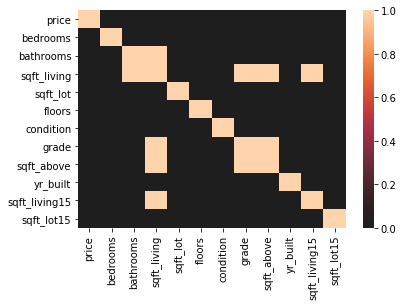

In [57]:
heatmap = abs(data.corr()) > 0.75 #we'll categorize high correlation as 0.75
display(sns.heatmap(heatmap,center=0))

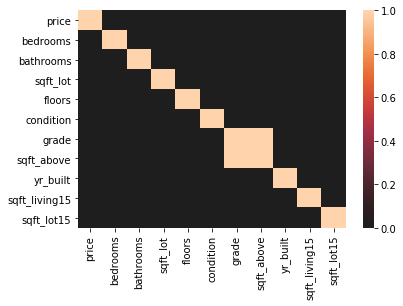

In [58]:
#drop category "sqft_living" because its too correlated
data = data.drop("sqft_living",axis=1)
heatmap = abs(data.corr()) > 0.75
display(sns.heatmap(heatmap,center=0))

We used a correlatiton level of 0.75 for each variable and found a high level of correlation between sqft_living and many other variables. For this reason, we dropped this data. Square footage is featured in many variables in different ways and we don't think this specific subset is worth keeping. We did notice some other variables that were highly correlated, but because it was far and few between, and these variables fluctuated with a degree change in correlation, I decided to keep them

#### Normalizing our Data

We need to convert all of our continuous numeric columns to the same scale by normalizing it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017B065B39B0>,
      dtype=object)

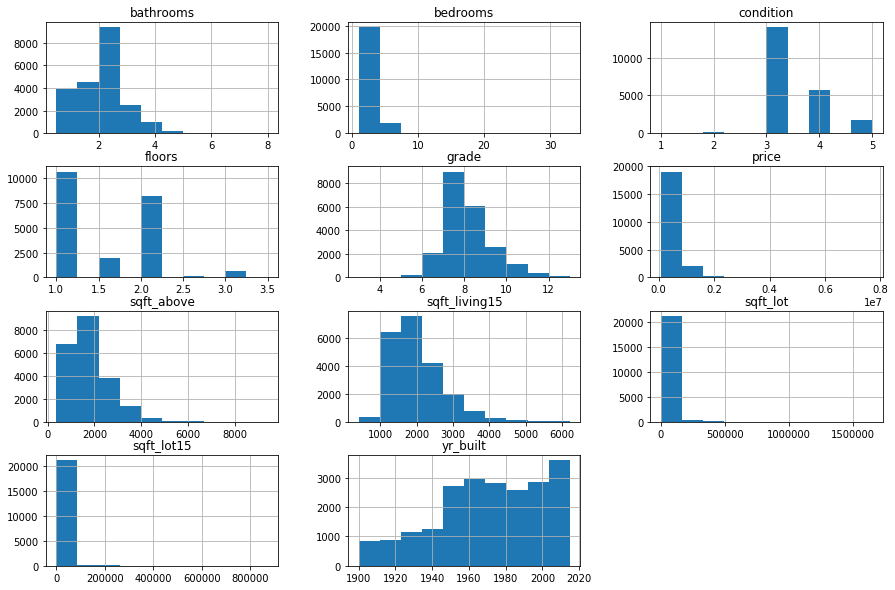

In [59]:
data.hist(figsize = (15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017B06E25EB8>,
      dtype=object)

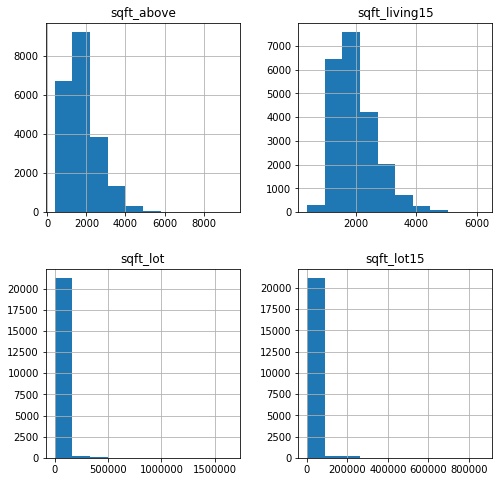

In [60]:
display(data[["sqft_lot","sqft_above","sqft_living15","sqft_lot15"]].hist(figsize = [8,8]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017B06D0EBA8>,
      dtype=object)

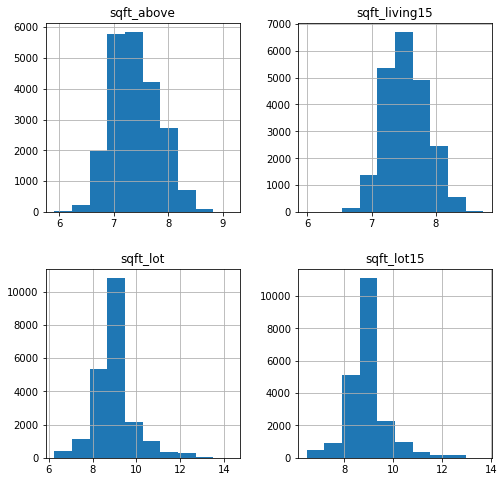

In [61]:
#all these columns are skewed or not normal, we'll use their log functions to normally distribute them
data_log = pd.DataFrame([])
for col in data[["sqft_lot","sqft_above","sqft_living15","sqft_lot15"]]:
    data_log[col] = np.log(data[col])
data_log.hist(figsize = [8,8])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017B06C61518>,
      dtype=object)

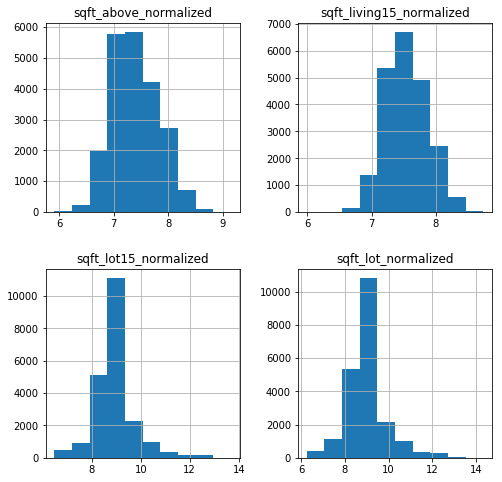

In [62]:
#Now we will scale the data
data_normalized = pd.DataFrame([])
for col in data_log[["sqft_lot","sqft_above","sqft_living15","sqft_lot15"]]:
    data_normalized[col + "_normalized"] = data_log[col]
data_normalized.hist(figsize = [8,8])    

In [63]:
for col in data.columns:
    if col not in ["sqft_lot","sqft_above","sqft_living15","sqft_lot15"]:
        data_normalized[col] = data[col]
data_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
sqft_lot_normalized         21597 non-null float64
sqft_above_normalized       21597 non-null float64
sqft_living15_normalized    21597 non-null float64
sqft_lot15_normalized       21597 non-null float64
date                        21597 non-null datetime64[ns]
price                       21597 non-null float64
bedrooms                    21597 non-null float64
bathrooms                   21597 non-null float64
floors                      21597 non-null float64
condition                   21597 non-null float64
grade                       21597 non-null float64
yr_built                    21597 non-null float64
zipcode                     21597 non-null object
has_basement                21597 non-null object
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 2.3+ MB


## Exploring our Data

This step focuses on getting to know the dataset you're working with. During this step, you'll create visualizations to really get a feel for your dataset. We mostly check for regression validity and column distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017B081485F8>,
      dtype=object)

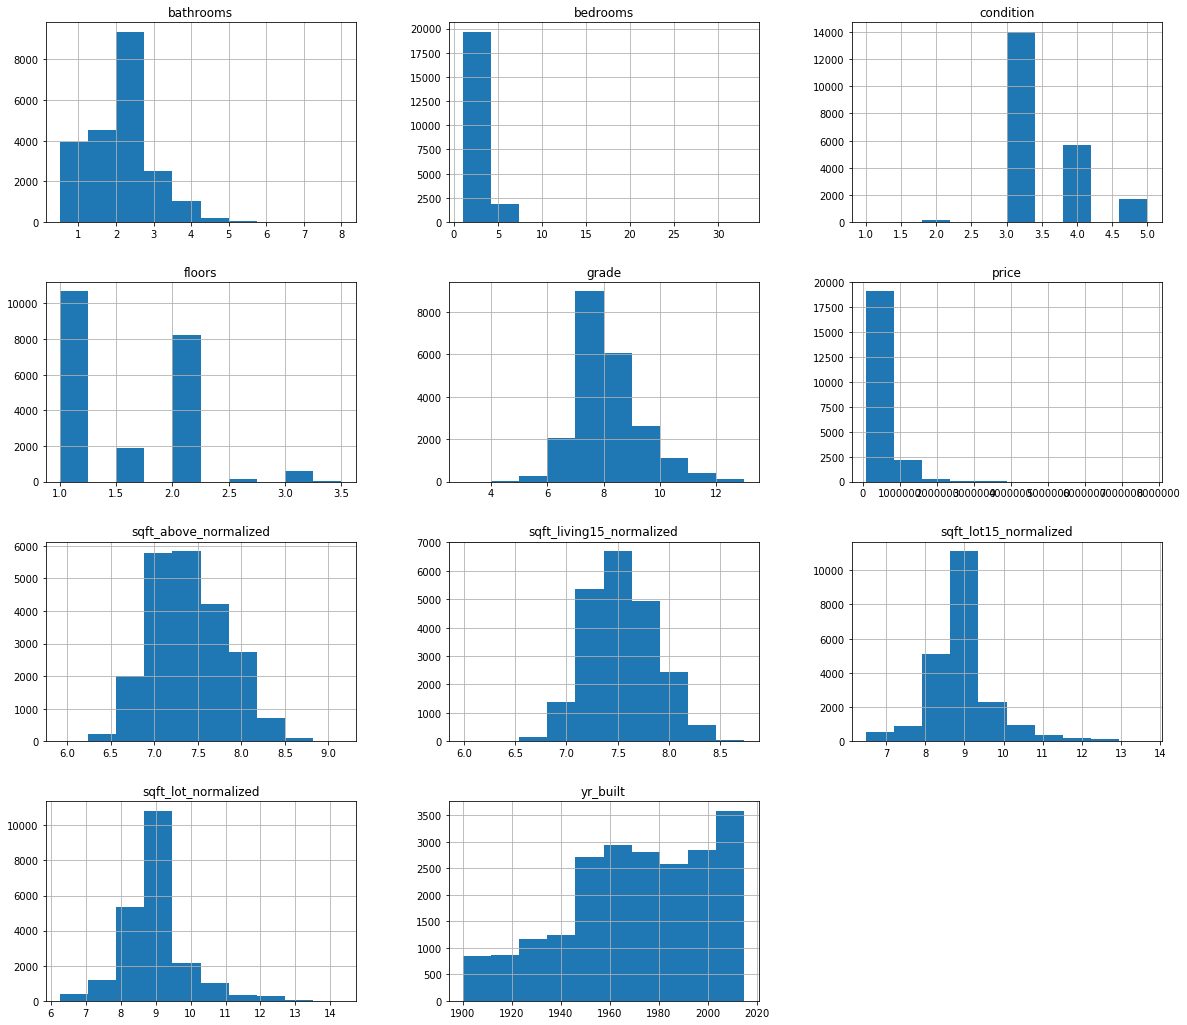

In [64]:
data_normalized.hist(figsize = (20,18))

#### Post Model Edits

In this area I made slight changes to the data set I thought would better represent the data after running the model

In [65]:
#R square value increased to .86 by retreiving the log of the following data
data_log["price"] = np.log(data["price"])
data_normalized["price"] = data_log["price"]
data_log["bathrooms"] = np.log(data["bathrooms"])
data_normalized["bathrooms"] = data_log["bathrooms"]
data_log["bedrooms"] = np.log(data["bedrooms"])
data_normalized["bedrooms"] = data_log["bedrooms"]
data_log["floors"] = np.log(data["floors"])
data_normalized["floors"] = data_log["floors"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017B085C9B38>,
      dtype=object)

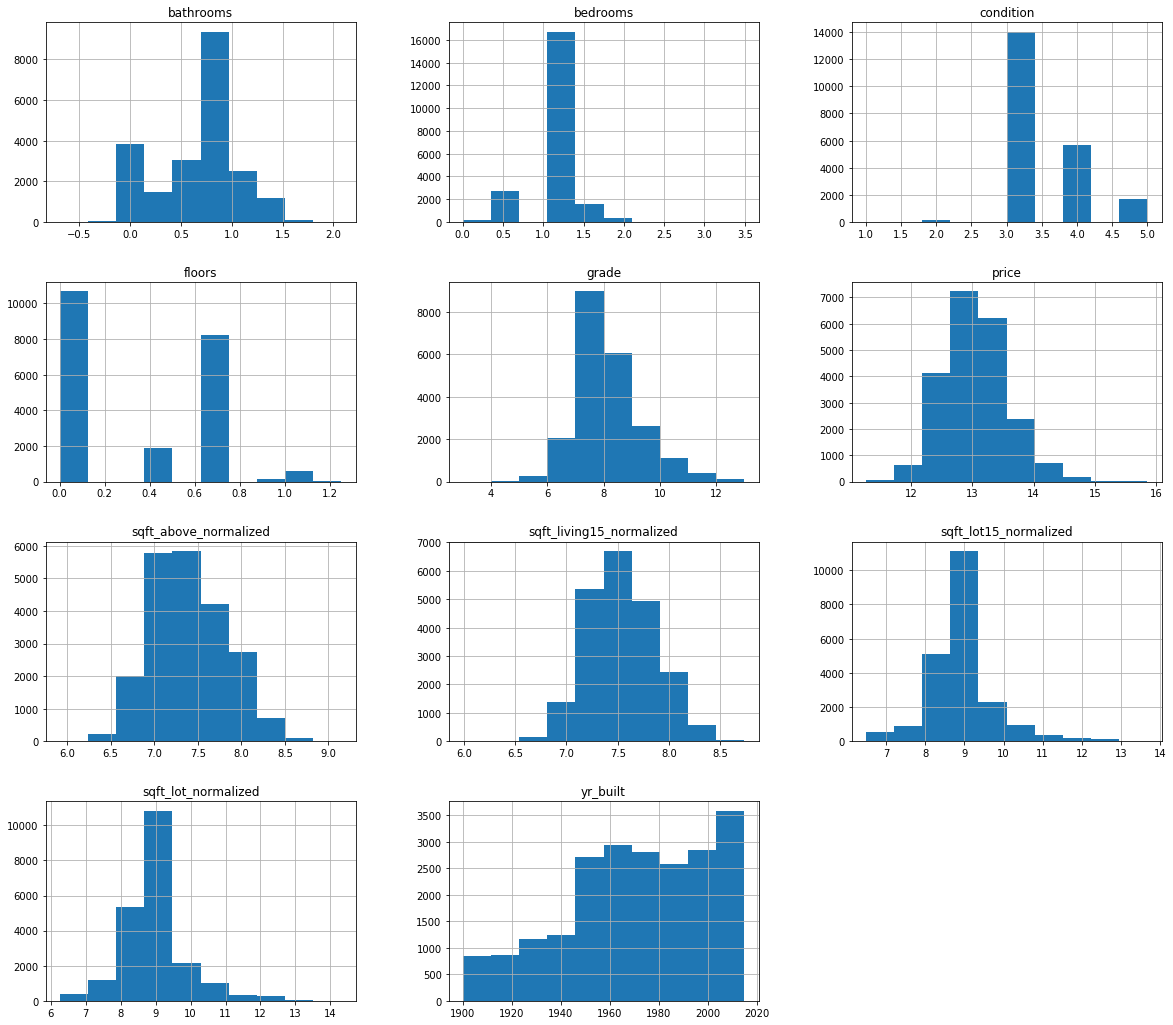

In [66]:
data_normalized.hist(figsize = (20,18))

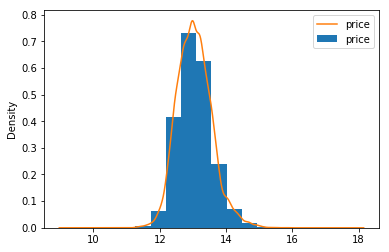

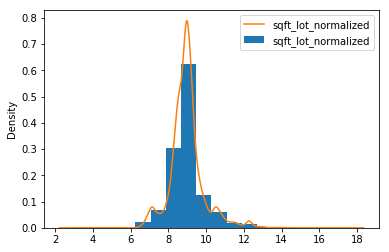

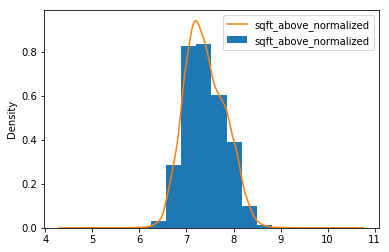

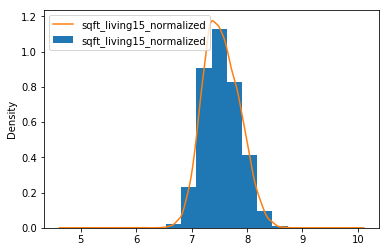

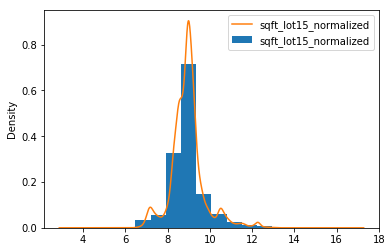

In [67]:
for col in data_normalized[["price","sqft_lot_normalized","sqft_above_normalized","sqft_living15_normalized","sqft_lot15_normalized"]]:
    data_normalized[col].plot.hist(density=True)
    data_normalized[col].plot.kde(label=col)
    plt.legend()
    plt.show()

In [68]:
data_normalized.describe()

,sqft_lot_normalized,sqft_above_normalized,sqft_living15_normalized,sqft_lot15_normalized,price,bedrooms,bathrooms,floors,condition,grade,yr_built
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,8.989805,7.395148,7.539494,8.960758,13.048211,1.177819,0.677623,0.338475,3.409825,7.657915,1970.999676
std,0.902078,0.427140,0.327467,0.812613,0.526555,0.283167,0.392481,0.352266,0.650546,1.173200,29.375234
min,6.253829,5.913503,5.988961,6.478510,11.264464,0.000000,-0.693147,0.000000,1.000000,3.000000,1900.000000
25%,8.525161,7.081709,7.306531,8.536996,12.682307,1.098612,0.559616,0.000000,3.000000,7.000000,1951.000000
50%,8.938269,7.352441,7.517521,8.938532,13.017003,1.098612,0.810930,0.405465,3.000000,7.000000,1975.000000
75%,9.276596,7.700748,7.766417,9.218606,13.377006,1.386294,0.916291,0.693147,4.000000,8.000000,1997.000000
max,14.317109,9.149528,8.733916,13.677627,15.856731,3.496508,2.079442,1.252763,5.000000,13.000000,2015.000000


C:\Users\Asad\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


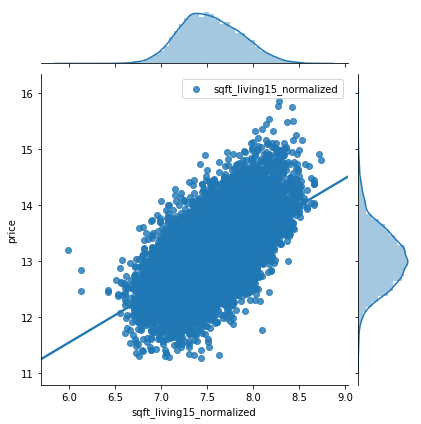

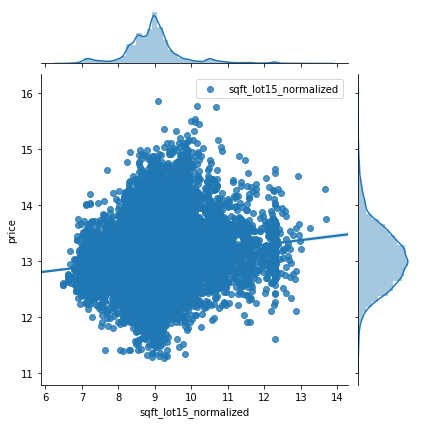

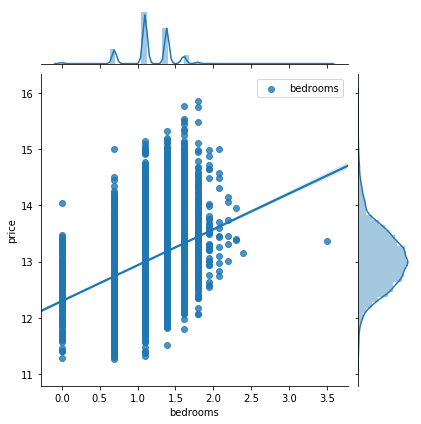

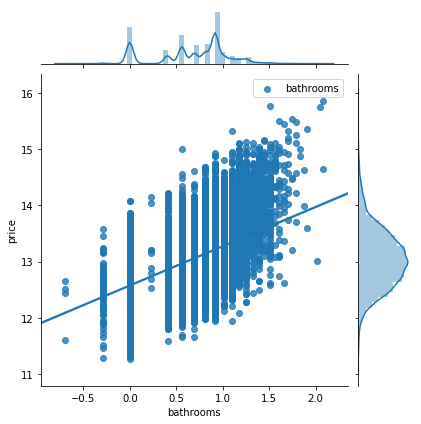

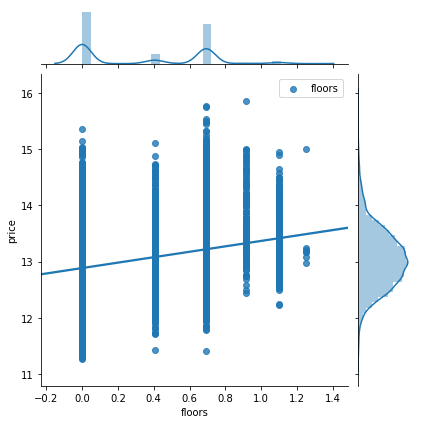

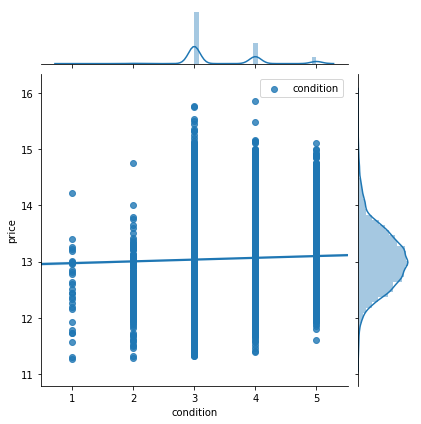

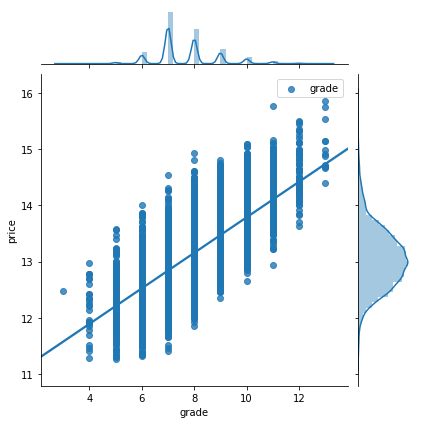

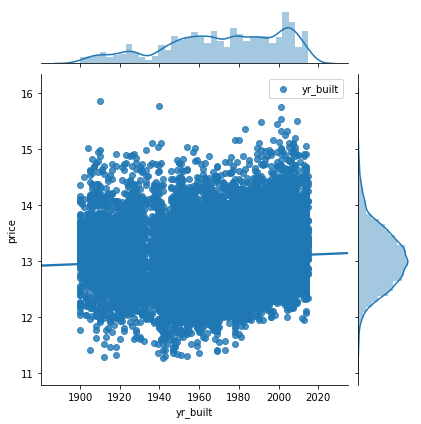

In [69]:
for col in ["sqft_living15_normalized","sqft_lot15_normalized","bedrooms","bathrooms","floors","condition","grade","yr_built"]:
    sns.jointplot(x=col, y="price", data = data_normalized, kind = "reg", label = col)
    plt.legend()
    plt.show()


Linearity assumption and heteroscedasticity was tested with sns jointplots.

The scatterplots below confirm that there is a lot of variation in the data, and that no one variable is a solid predictor of house price. Some variables exhibit a degree of heteroscedasticity but most appear sufficiently homoscedastic to use in linear regression.


In [70]:
data_final = pd.get_dummies(data_normalized)
data_final.head()

,sqft_lot_normalized,sqft_above_normalized,sqft_living15_normalized,sqft_lot15_normalized,date,price,bedrooms,bathrooms,floors,condition,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_0,has_basement_1
0,8.639411,7.073270,7.200425,8.639411,2014-10-13,12.309982,1.098612,0.000000,0.000000,3.0,...,0,0,0,0,1,0,0,0,1,0
1,8.887653,7.682482,7.432484,8.941022,2014-12-09,13.195614,1.098612,0.810930,0.693147,3.0,...,0,0,0,0,0,0,0,0,0,1
2,9.210340,6.646391,7.908387,8.994917,2015-02-25,12.100712,0.693147,0.000000,0.000000,3.0,...,0,0,0,0,0,0,0,0,1,0
3,8.517193,6.956545,7.215240,8.517193,2014-12-09,13.311329,1.386294,1.098612,0.000000,5.0,...,0,0,0,0,0,0,0,0,0,1
4,8.997147,7.426549,7.495542,8.923058,2015-02-18,13.142166,1.098612,0.693147,0.000000,3.0,...,0,0,0,0,0,0,0,0,1,0


In [96]:
#these data sets had a high p value, so we are removing them post
for col in data_normalized.columns:
    if col in ["zipcode_98040","zipcode_98103","zipcode_98107"]:
        data_normalized = data_normalized.drop(col,axis=1)

Now that we've gone thru and explored our data and have an understanding of it, we can one-hot encode our categorical variables

# Questions

Through data exploration you can ask certain questions besides the scope of a singular model.

1. Are there certain locations where houses tend to be more or less expensive?
2. How does the grading of a house correlate to its actual price?
3. How do house prices change over time?

### Price of Land and Area

To answer our first question -- Are there certain locations where housing tends to be more or less expensive -- we need to calculate the price per square footage of land to be able to represent affluent housing.

In [72]:
data["price_per_sqftlot"] = data.price/data.sqft_lot

In [73]:
data.price_per_sqftlot.describe()

count    21597.000000
mean        88.988978
std         94.059663
min          0.163119
25%         33.333333
50%         59.262128
75%        107.609531
max       2019.704433
Name: price_per_sqftlot, dtype: float64

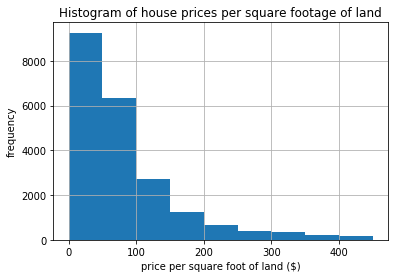

In [74]:
data.price_per_sqftlot.hist(bins=range(0,500,50))
plt.xlabel("price per square foot of land ($)")
plt.ylabel("frequency")
plt.title("Histogram of house prices per square footage of land")
plt.show()

When graphed, we see what is often represented in real life. There is a high frequency of low-medium rate housing areas as compared to "the wealthy few'

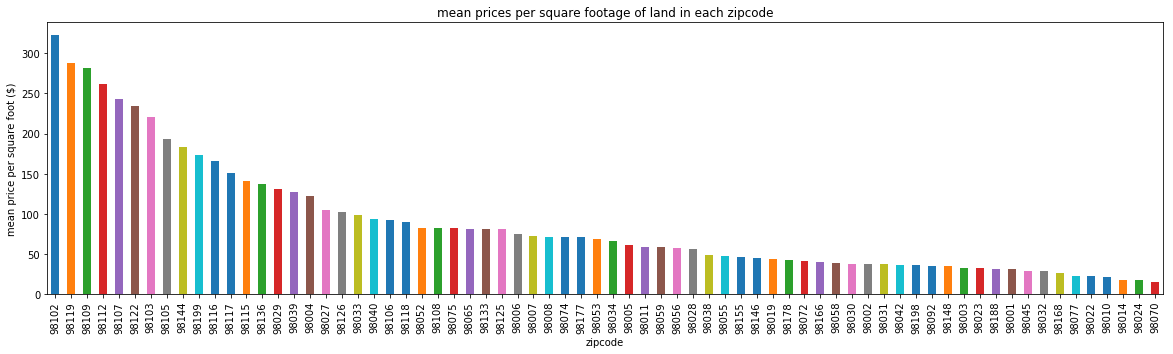

In [75]:
zip_pps = data.groupby(["zipcode"])["price_per_sqftlot"].mean().sort_values(ascending=False)
zip_pps.plot(kind="bar",figsize = (20,5))
plt.xlabel("zipcode")
plt.ylabel("mean price per square foot ($)")
plt.title("mean prices per square footage of land in each zipcode")
plt.show()

We were then able to plot each zipcode against the price per square footage found in their area, sorting it by frequency to show areas of higher affluency

### Grade effect on housing

Society itself has a huge impact on anythings worth, which is why its important to understand how a "grade" given to a house greatly impacts its worth.

In [76]:
data.grade.value_counts()

7.0     8974
8.0     6065
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      89
4.0       27
13.0      13
3.0        1
Name: grade, dtype: int64

A quick check shows theres a somewhat normal distribution of grading for these houses. Most receive a score between 6-10, while the extremes represent far fewer.

In [77]:
data.groupby(["grade"])["price_per_sqftlot"].mean()

grade
3.0      20.183345
4.0      26.932439
5.0      35.438234
6.0      48.600930
7.0      71.478585
8.0     113.877245
9.0     115.691846
10.0    107.104452
11.0    115.697225
12.0    103.504228
13.0    157.142329
Name: price_per_sqftlot, dtype: float64

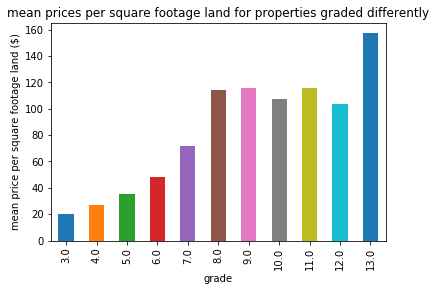

In [78]:
data.groupby(["grade"])["price_per_sqftlot"].mean().plot(kind="bar")
plt.xlabel("grade")
plt.ylabel("mean price per square footage land ($)")
plt.title("mean prices per square footage land for properties graded differently")
plt.show()

We used the previous variable price per square footage and graphed it against the grade given to each house. The resulting information shows indeed that there is a correlation between grading and worth of the house. Although it isnt a substantial factor in and of itself, it invites further research on what a seller would want to focus on in home repairs when selling his/her house to acheive a higher grade.

### Price change over time

When to buy/sell a house is also very important, which is what is explored in this question

In [79]:
monthly_prices = pd.DataFrame((data.groupby(data["date"].dt.strftime("%B %Y"))["price"].mean()))
monthly_prices = monthly_prices.reset_index()


In [80]:
ordered_months = pd.DataFrame((sorted(list(monthly_prices["date"]),key = lambda x: datetime.strptime(x,"%B %Y"))))
ordered_months.rename(columns={0:"date"},inplace= True)

In [81]:
ordered_monthly_prices = pd.concat([ordered_months.set_index("date"),monthly_prices.set_index("date")],axis=1,join="inner").reset_index()
ordered_monthly_prices

,date,price
0,May 2014,548166.600113
1,June 2014,557534.318182
2,July 2014,544892.161013
3,August 2014,536655.212481
4,September 2014,529723.517787
5,October 2014,539439.447228
6,November 2014,522359.903478
7,December 2014,524799.902041
8,January 2015,525963.251534
9,February 2015,508520.051323


The data given is set between the years 2014-2015 beginning in May for 12 months. The average house prices sold per month were graphed

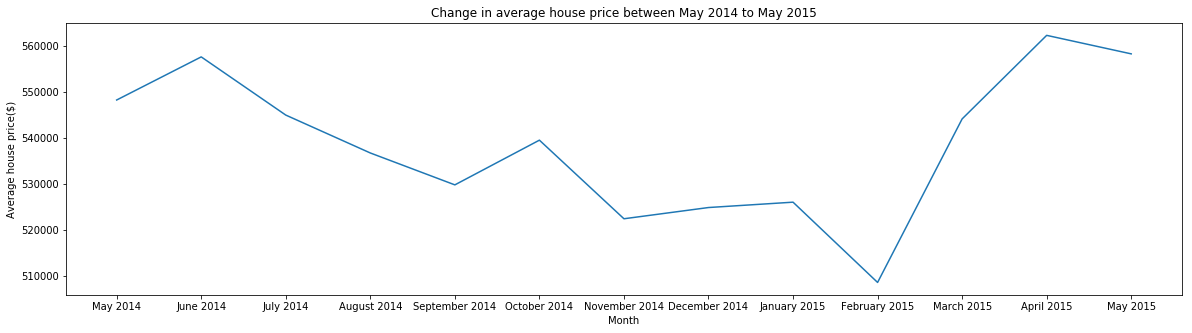

In [82]:
plt.figure(figsize=(20,5))
plt.plot(ordered_monthly_prices.date, ordered_monthly_prices.price)
plt.xlabel("Month")
plt.ylabel("Average house price($)")
plt.title("Change in average house price between May 2014 to May 2015")
plt.show()

By plotting the data, we're able to see a trend of pricing increase between the months of Feburary to April.

### Modeling Our Data

It consists of building and tuning models using all the tools you have in your data science toolbox. In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results. As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like Scrub or Explore, and make some changes to see how it affects the model. 

In [83]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 84 columns):
sqft_lot_normalized         21597 non-null float64
sqft_above_normalized       21597 non-null float64
sqft_living15_normalized    21597 non-null float64
sqft_lot15_normalized       21597 non-null float64
date                        21597 non-null datetime64[ns]
price                       21597 non-null float64
bedrooms                    21597 non-null float64
bathrooms                   21597 non-null float64
floors                      21597 non-null float64
condition                   21597 non-null float64
grade                       21597 non-null float64
yr_built                    21597 non-null float64
zipcode_98001               21597 non-null uint8
zipcode_98002               21597 non-null uint8
zipcode_98003               21597 non-null uint8
zipcode_98004               21597 non-null uint8
zipcode_98005               21597 non-null uint8
zipcode_98006              

Here we used the stas models.api to run our ols regression on all our data

In [84]:
outcome = "price"
pred = data_final.drop(["price","date","has_basement_0","zipcode_98199"],axis=1)
pred_sum = "+".join(pred.columns)
formula = outcome + "~" + pred_sum
pred_int = sm.add_constant(pred)
model = sm.OLS(data_final["price"],pred_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1705.
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        08:28:18   Log-Likelihood:                 4730.9
No. Observations:               21597   AIC:                            -9300.
Df Residuals:                   21516   BIC:                            -8653.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        9.1334      0.167     54.625      0.000       8.806       9.461
sqft_lot_normalized          0.0748      0.004     19.105      0.000       0.067       0.083
sqft_above_normalized        0.3948      0.008     51.409      0.000       0.380       0.410
sqft_living15_normalized     0.2081      0.007     29.728      0.000       0.194       0.222
sqft_lot15_normalized       -0.0152      0.004     -3.530      0.000      -0.024      -0.007
bedrooms                    -0.0498      0.006     -7.908      0.000      -0.062      -0.037
bathrooms                    0.0992      0.006     16.383      0.000       0.087       0.111
floors                      -0.0312      0.006     -5.078      0.000      -0.043      -0.019
condition                    0.0537      0.002     23.354      0.000       0.049       0.058
grade                        0.1107      0.002     52.312      0.000       0.107       0.115
yr_built                    -0.0009   7.58e-05    -11.936      0.000      -0.001      -0.001
zipcode_98001               -0.8864      0.016    -57.144      0.000      -0.917      -0.856
zipcode_98002               -0.8741      0.018    -48.462      0.000      -0.909      -0.839
zipcode_98003               -0.8739      0.016    -53.568      0.000      -0.906      -0.842
zipcode_98004                0.2174      0.016     13.791      0.000       0.186       0.248
zipcode_98005               -0.2078      0.019    -10.991      0.000      -0.245      -0.171
zipcode_98006               -0.2441      0.014    -16.998      0.000      -0.272      -0.216
zipcode_98007               -0.2607      0.020    -13.077      0.000      -0.300      -0.222
zipcode_98008               -0.2114      0.016    -13.050      0.000      -0.243      -0.180
zipcode_98010               -0.6502      0.023    -28.253      0.000      -0.695      -0.605
zipcode_98011               -0.4625      0.018    -25.640      0.000      -0.498      -0.427
zipcode_98014               -0.5843      0.022    -27.089      0.000      -0.627      -0.542
zipcode_98019               -0.5808      0.019    -31.342      0.000      -0.617      -0.545
zipcode_98022               -0.8187      0.018    -46.644      0.000      -0.853      -0.784
zipcode_98023               -0.9189      0.014    -63.911      0.000      -0.947      -0.891
zipcode_98024               -0.4721      0.025    -18.777      0.000      -0.521      -0.423
zipcode_98027               -0.3984      0.015    -26.624      0.000      -0.428      -0.369
zipcode_98028               -0.4768      0.016    -29.328      0.000      -0.509      -0.445
zipcode_98029               -0.2960      0.016    -18.785      0.000      -0.327      -0.265
zipcode_98030               -0.8453      0.017    -50.295      0.000      -0.878      -0.812
zipcode_98031 

Our coefficients for our model are interpreted as "how does log Y change for each additional unit X, and specifically X being log for the sqft_lot, sqft_above, sqft_living15, and sqft_lot features.

Each coefficient has a p-value with a threshold of 0.05 (there are some zipcodes which don't, so we removed them further up in the notebook), which we will use stepwise selection to choose the most appropriate features. Our stepwise selection shows us the variable that has an assoociated parameter estimate with the lowest p-value. Each subsequent lowest p-value is continually added. The algorithm will look at the p=values of all the other parameter estimates which were added to the model previously, and remove them if the p-value exceeds a certain value. The algorithm stops when no variables can be added or removed given the threshold values.

In [85]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [86]:
result = stepwise_selection(pred,data_final["price"], verbose = True)
print("resulting features:")
print(result)

Add  sqft_living15_normalized       with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  grade                          with p-value 0.0
Add  zipcode_98023                  with p-value 1.02313e-230
Add  zipcode_98004                  with p-value 1.98925e-206
Add  zipcode_98003                  with p-value 1.26714e-121
Add  zipcode_98042                  with p-value 5.16091e-129
Add  zipcode_98001                  with p-value 2.11932e-140
Add  zipcode_98092                  with p-value 2.62943e-147
Add  zipcode_98058                  with p-value 1.3813e-109
Add  zipcode_98031                  with p-value 2.14614e-111
Add  zipcode_98030                  with p-value 7.80666e-117
Add  zipcode_98038                  with p-value 6.24387e-127
Add  zipcode_98168                  with p-value 3.72672e-117
Add  zipcode_98198                  with p-value 1.59323e-125
Add  zipcode_98002                  with p-va

C:\Users\Asad\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Drop zipcode_98144                  with p-value 0.0695272
Add  zipcode_98177                  with p-value 3.05385e-13
Add  zipcode_98006                  with p-value 1.99273e-17
Drop zipcode_98136                  with p-value 0.713048
Add  zipcode_98007                  with p-value 6.90994e-12
Add  zipcode_98008                  with p-value 2.06458e-11
Drop zipcode_98033                  with p-value 0.065278
Add  zipcode_98005                  with p-value 4.73679e-11
Add  zipcode_98144                  with p-value 1.04471e-11
Drop zipcode_98116                  with p-value 0.608208
Add  zipcode_98136                  with p-value 2.86265e-09
Drop zipcode_98122                  with p-value 0.947879
Add  zipcode_98033                  with p-value 2.99633e-06
Drop zipcode_98115                  with p-value 0.9768
Add  floors                         with p-value 2.65929e-07
Drop zipcode_98117                  with p-value 0.610071
Add  sqft_lot15_normalized          with p-val

To evaluate our model, we want to compare your predicted values with the actual value. The difference between the two values is referred to as the residuals. When using a train test split, we'll compare your residuals for both test set and training set:

In [99]:
y = data_final[["price"]]
X = data_final.drop(["price","date","has_basement_0","zipcode_98199"],axis = 1)

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [101]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


In [102]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [103]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [104]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.037808415729345256
Test Mean Squarred Error: 0.03791532194323297


This shows us we haven't overfitted our model

Cross-Validation MSE allows us to average different test-train-splits. This will be closer to the model's actual MSE, since "noisy" results that are higher than average will cancel out the "noisy" results that are lower than average.

In [105]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-0.038331216289309335
-0.03830672856409388
-0.038178238565531014


Here's a reduced list of coefficients essentially showing a log scaled price increase when the coefficient is increased (for some variables this is also log scaled)

In [106]:
# Producing a list of variables sorted by their absolute coefficient value, with the most important variables at the top
final_model_coefficients = pd.DataFrame(model.params)
final_model_coefficients.rename(columns={0:'coefficient'}, inplace=True)
final_model_coefficients.iloc[(-np.abs(final_model_coefficients['coefficient'].values)).argsort()]

,coefficient
const,9.133430
zipcode_98023,-0.918906
zipcode_98032,-0.903354
zipcode_98001,-0.886419
zipcode_98092,-0.880783
zipcode_98002,-0.874121
zipcode_98003,-0.873907
zipcode_98030,-0.845311
zipcode_98042,-0.829548
zipcode_98031,-0.823924


Specifically looking at 3 coefficients: grade, sqft_lot_normalized, and condition we can see that there is an increase in log(price) per increase of each variable. Because grade and condition weren't normalized, these relationships hold the same. But for sqft_lot we have to consider that although our model is linear the relationship to the target is not. We can either undo this relationship to get a 1:1 linear increase explains increase relationship or transform all future values to match our current model